In [2]:
# 아이의 시험 점수를 종속변수로, 그 외 다른 변수를 독립변수로 하는 지도학습 알고리즘 문제입니다.

## 데이터셋 컬럼
- kid_score : 아이 iq 점수
- mom_hs : 엄마의 고등학교 졸업여부
- mom_iq : 엄마의 iq
- mom_work : 엄마가 일하는 정도
- mom_age : 엄마의 나이

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# 1. 필요한 모듈을 모두 여기에 기술하세요
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [4]:
# 2. 데이터를 읽어 데이터프레임으로 저장하세요
kidiq_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Python_colab/Web Service/ML/data/kidiq.csv')
kidiq_df

,kid_score,mom_hs,mom_iq,mom_work,mom_age
0,65,1,121.117529,4,27
1,98,1,89.361882,4,25
2,85,1,115.443165,4,27
3,83,1,99.449639,3,25
4,115,1,92.745710,4,27
...,...,...,...,...,...
429,94,0,84.877412,4,21
430,76,1,92.990392,4,23
431,50,0,94.859708,2,24
432,88,1,96.856624,2,21


In [5]:
# 3. info() 메소드를 사용하여 데이터를 살펴보고 해당 데이터의 특징을 적어보세요
kidiq_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434 entries, 0 to 433
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   kid_score  434 non-null    int64  
 1   mom_hs     434 non-null    int64  
 2   mom_iq     434 non-null    float64
 3   mom_work   434 non-null    int64  
 4   mom_age    434 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 17.1 KB


### # 3. info() 메소드를 사용하여 데이터를 살펴보고 해당 데이터의 특징을 적어보세요

1. 총 데이터갯수는 434개이고 컬럼이 5개인 데이터셋이다.
모든 컬럼의 갯수가 총 갯수와 동일한 것으로 보아 결측치가 없다.
2. 컬럼중 mom.iq를 제외하고 모두 int64 즉 정수형이며, mom.iq만 실수형으로 되어있다.
3. 종속변수 : kid_score
4. 독립변수 : mom_hs, mom_iq, mom_work, mom_age

In [6]:
# 4. 데이터프레임의 shape를 확인하세요
kidiq_df.shape

(434, 5)

In [7]:
# 5. 결측치 데이터가 있다면 모두 삭제하세요
kidiq_df.isna().sum()
# (단, 없어도 삭제 코드를 작성하고 확인하세요)
kidiq_df = kidiq_df.dropna()

In [8]:
# 6. describe() 메소드를 사용하여 데이터 통계정보를 확인하고 해당 데이터의 특징을 간단하게 적어보세요
# (숫자형과 문자형 모두 확인하세요)
round(kidiq_df.describe(), 2)

,kid_score,mom_hs,mom_iq,mom_work,mom_age
count,434.00,434.00,434.00,434.00,434.00
mean,86.80,0.79,100.00,2.90,22.79
std,20.41,0.41,15.00,1.18,2.70
min,20.00,0.00,71.04,1.00,17.00
25%,74.00,1.00,88.66,2.00,21.00
50%,90.00,1.00,97.92,3.00,23.00
75%,102.00,1.00,110.27,4.00,25.00
max,144.00,1.00,138.89,4.00,29.00


### # 6. describe() 메소드를 사용하여 데이터 통계정보를 확인하고 해당 데이터의 특징을 간단하게 적어보세요

*   `kid_score`: 아이들의 iq는 평균이 86.6으로 최소 20점, 최대 144점으로 범위가 꽤 넓은편이며, 표준편차가 20.41로 각각 데이터간의 점수 차이가 크다.
*   `mom_hs`: 엄마의 고졸여부로 평균이 0.79이며 이는 확률로 79%이다. 고졸여부는 이미 0,1로 인코딩되어있다.
*   `mom_iq`: 엄마의 iq는 평균이 100으로 범위는 71.04점~138.89점이다. 표준편차는 15.0으로 무난..하다고 볼 수 있다.
*   `mom_work`: 평균은 2.9로 1~4범위 내에서 중간이상이다.
*   `mom_age`: 평균은 22.79세로 범위는 17~29세이다. 표준편차가 2.7인것을 보아 데이터간의 차이가 크지 않다.



In [9]:
# 7. 아래 내용을 확인하고 컬럼을 추가하세요.
# mom_iq_c: 엄마의 전체 IQ평균에서 해당 데이터의 엄마의 IQ의 차를 구해 변수로 만드세요
# mom_age_c: 엄마의 전체 나이평균에서 해당 데이터의 엄마의 나이의 차를 구해 변수로 만드세요
kidiq_df['mom_iq_c'] = kidiq_df['mom_iq'] - kidiq_df['mom_iq'].mean()
kidiq_df['mom_age_c'] = kidiq_df['mom_age'] - kidiq_df['mom_age'].mean()
display(kidiq_df.head())

,kid_score,mom_hs,mom_iq,mom_work,mom_age,mom_iq_c,mom_age_c
0,65,1,121.117529,4,27,21.117529,4.214286
1,98,1,89.361882,4,25,-10.638118,2.214286
2,85,1,115.443165,4,27,15.443165,4.214286
3,83,1,99.449639,3,25,-0.550361,2.214286
4,115,1,92.745710,4,27,-7.254290,4.214286


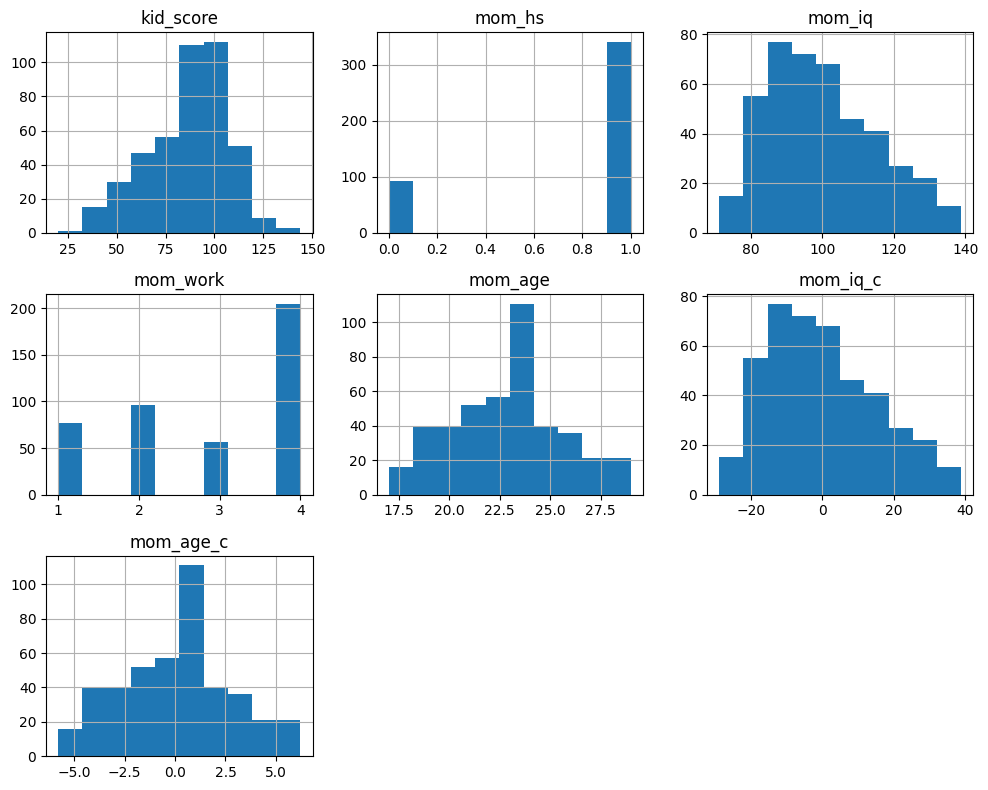

In [10]:
# 8. 아이의 시험 점수와 다른 변수에 대해 hist 그래프를 모두 만들어 insight를 간단히 적어보세요
# (단, subplot을 이용하여 한번에 그려보세요)
kidiq_df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

### # 8. 아이의 시험 점수와 다른 변수에 대해 hist 그래프를 모두 만들어 insight를 간단히 적어보세요

1. kid_score : 정규분포와 비슷한 모양으로, 극단치가 적다. 80~100사이의 iq를 가진 아이들이 많다.

2. mom_hs : 엄마의 고졸여부는 0,1로 인코딩되어있어 0,1값만 갖는 것을 볼 수 있다. 1의 크기가 큰 것으로 보아, 고졸이 더 많다.

3. mom.iq : kid_iq로 유사하지만 정규분포에 더 유사한 형태를 띈다. mom.iq는 평균이 100으로 100 전후로 데이터셋이 가장많이 분포해있다. 또한 양쪽 극단치가 거의 균등하다. 80~100 사이의 iq를 가진 엄마들이 많다.

4. mom_work : 일을 많이 하는 엄마가 대부분이다.

5. mom_age : 22-23살에 많이 분포해있으며 비교적 정규분포 형태를 띄고있다.

6. 전체적인 특징
    - 대부분 정규분포에 가까운 형태를 띈다.
    - 이상치가 많지 않아보임
    - mom_hs, mom_work만 범주형 특성을 갖고있다.


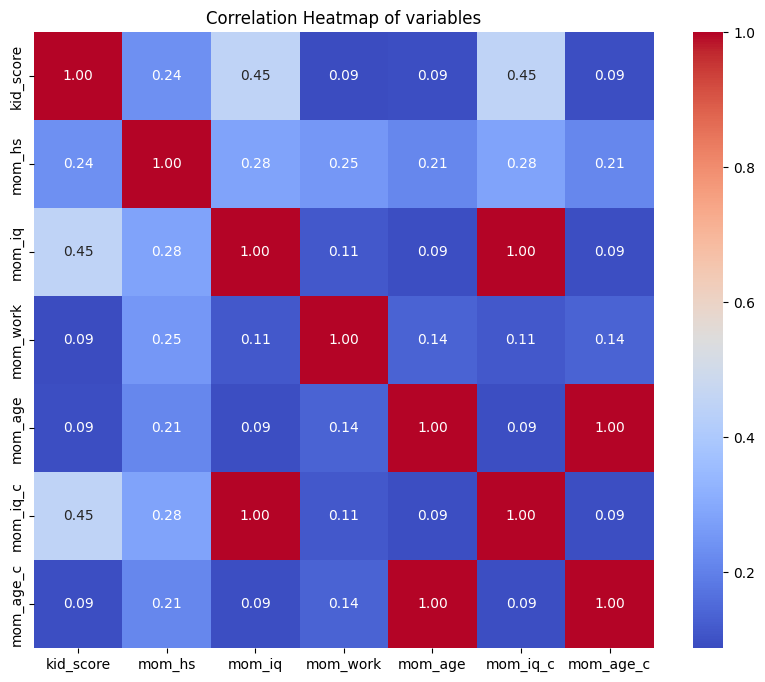

In [11]:
# 9. 종속변수와 독립변수들과의 상관관계를 Heatmap으로 표현하고 insight를 간단히 적어보세요
correlation_matrix = kidiq_df.corr()

# 상관관계 Heatmap 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of variables')
plt.show()

### # 9. 종속변수와 독립변수들과의 상관관계를 Heatmap으로 표현하고 insight를 간단히 적어보세요

1. mom_iq (0.45) - 가장 강한 상관관계
- 엄마 IQ가 높을수록 아이 점수도 높음

2. mom_hs (0.24) - 중간 정도 상관관계
- 엄마가 고졸이면 아이 점수가 조금 더 높음

3. mom_work (0.09) - 약한 상관관계
- 엄마가 일하는 정도는 아이 점수와 별 관계 없음

4. mom_age (0.09) - 약한 상관관계
- 엄마 나이도 아이 점수와 별 관계 없음

**엄마 IQ(0.45) > 엄마 학력(0.24) > 나머지(0.09)**

아이 성적은 엄마의 지능과 교육 수준에 영향받지만, 엄마가 얼마나 일하거나 나이는 별로 중요하지 않음

In [12]:
# 10. train 데이터와 test 데이터를 각각 8:2로 나눠 저장하세요
X = kidiq_df.drop('kid_score', axis=1)
y = kidiq_df['kid_score']

# 학습 데이터와 테스트 데이터 분리 (8:2 비율)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2025)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (347, 6)
X_test shape: (87, 6)
y_train shape: (347,)
y_test shape: (87,)


In [13]:
# 11. LinearRegression에 대해 간단히 설명하고 train 데이터의 독립변수와 종속변수를 넣고 학습하세요
model = LinearRegression()

# 모델 학습
model.fit(X_train, y_train)

LinearRegression()

### # 11. LinearRegression에 대해 간단히 설명하고 train 데이터의 독립변수와 종속변수를 넣고 학습하세요
사이킷런의 선형회귀는 최소제곱법을 기반으로 실제 입력데이터값과 목표값 사이의 잔차를 제곱하여 더한 값을 최소화시켜 최적의 가중치와 절편을 구한다. 이때, 가중치는 각 독립변수가 종속변수에 미치는 영향의 크기를 나타내는 계수이다. 이 방식은 선형 관계가 존재하는 데이터에서 해석이 용이하고 계산이 빠르며 과적합 위험이 낮아 효율적이다.

In [14]:
# 12. 위 학습된 모델의 W, b, RMSE를 구하세요
W = model.coef_
b = model.intercept_

print("모델의 가중치 (W):", W)
print("모델의 절편 (b):", b)

y_pred = model.predict(X_test)

# RMSE 계산
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("테스트 데이터에 대한 RMSE:", rmse)

모델의 가중치 (W): [5.09817673 0.29270069 0.39624175 0.08400192 0.29270069 0.08400192]
모델의 절편 (b): 49.857239867981555
테스트 데이터에 대한 RMSE: 17.756939589876556


In [15]:
# 13. 위 학습된 선형회귀 모델을 이용해 크로스벨리데이션을 이용하여 RMSE의 평균 값을 확인하세요
# 단, k는 5로 함

# 5-fold Cross-validation 수행
rmse_with_cv = np.sqrt(-cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5))

print("각 Fold의 RMSE:", rmse_with_cv)
print("Cross-validation RMSE 평균:", np.mean(rmse_with_cv))

각 Fold의 RMSE: [18.23774825 17.30075971 16.01374154 24.29526386 18.35104202]
Cross-validation RMSE 평균: 18.839711075764928


In [16]:
# 14. 테스트 데이터를 모델에 넣고 accuracy를 확인하세요  --> accuracy ????
# RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

# MAE (Mean Absolute Error)
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

# R² Score (결정계수)
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)

RMSE: 17.756939589876556
MAE: 14.103842412138768
R² Score: 0.14524694807628658


In [17]:
# 15. 테스트 데이터를 직접 작성하여 모델에 데이터를 넣고 결과를 확인하세요
new_data = pd.DataFrame({
    'mom_hs': [1],
    'mom_iq': [105.0],
    'mom_work': [3],
    'mom_age': [25],
    'mom_iq_c': [105.0 - kidiq_df['mom_iq'].mean()], # 엄마 IQ 평균과의 차이 계산
    'mom_age_c': [25 - kidiq_df['mom_age'].mean()] # 엄마 나이 평균과의 차이 계산
})

# 모델을 사용하여 예측
predicted_kid_score = model.predict(new_data)

print("예측된 아이의 iq점:", predicted_kid_score[0])

예측된 아이의 iq점: 90.6272697231328


In [18]:
# 16. 결정 나무를 이용하여 결과를 보고 LinearRegression의 결과와 비교해보세요.
# 단 하이퍼 파라미터는 random_state만 적용
dt_model = DecisionTreeRegressor(random_state=2025)

dt_model.fit(X_train, y_train)

# 테스트 데이터 예측
y_pred_dt = dt_model.predict(X_test)

# 성능 평가 (RMSE, R-squared)
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
r2_dt = r2_score(y_test, y_pred_dt)

print("\n=== RMSE ===")
print(f"Linear Regression RMSE: {rmse}")
print(f"Decision Tree RMSE: {rmse_dt}")
print("\n=== R^2 ===")
print(f"Linear Regression R²: {r2}")
print(f"Decision Tree R²: {r2_dt}")

# Linear Regression이 더 좋다.
# RMSE: 17.76 vs 25.62 (낮을수록 좋음)
# R²: 0.145 vs -0.779 (높을수록 좋음)
# 결정트리 R^2는 평균보다도 낮아서 과적합 발생할 수 있다.


=== RMSE ===
Linear Regression RMSE: 17.756939589876556
Decision Tree RMSE: 25.619626496370664

=== R^2 ===
Linear Regression R²: 0.14524694807628658
Decision Tree R²: -0.7793034205788674


In [19]:
# 17. 적절한 하이퍼 파라미터를 적용한 결정 나무를 이용하여 결과를 보고 위 결정 나무의 결과와 비교해보세요.
dt_tuned = DecisionTreeRegressor(
    max_depth=5,
    min_samples_split=20,
    min_samples_leaf=10,
    random_state=2025
)

dt_tuned.fit(X_train, y_train)
y_pred_tuned = dt_tuned.predict(X_test)

rmse_tuned = np.sqrt(mean_squared_error(y_test, y_pred_tuned))
r2_tuned = r2_score(y_test, y_pred_tuned)

print("\n=== RMSE ===")
print("튜닝된 결정 트리 RMSE:", rmse_tuned)
print(f"튜닝 전 결정트리 RMSE: {rmse_dt}")
print("\n=== R^2 ===")
print("튜닝된 결정 트리 R²:", r2_tuned)
print(f"튜닝 전 결정트리 R²: {r2_dt}")

# 하이퍼파라미터 튜닝으로 과적합이 완화됨
# 하지만 여전히 Linear Regression이 좋다.
# 이 데이터셋은 선형 관계가 강해서 선형회귀가 더 적합한 듯


=== RMSE ===
튜닝된 결정 트리 RMSE: 20.338687850356866
튜닝 전 결정트리 RMSE: 25.619626496370664

=== R^2 ===
튜닝된 결정 트리 R²: -0.12137349736996583
튜닝 전 결정트리 R²: -0.7793034205788674


In [20]:
# 18. 부스팅 모델 중 하나를 선택하여 학습을 한 뒤, 위 결과들과 비교해보세요.

# GradientBoost
gb_model = GradientBoostingRegressor(random_state=2025)
gb_model.fit(X_train, y_train)

y_pred_gb = gb_model.predict(X_test)

rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
r2_gb = r2_score(y_test, y_pred_gb)

# XGBoost
xgb_model = XGBRegressor(random_state=2025)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)


rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

print("\n=== 전체 모델 비교 (최종) ===")
print(f"Linear Regression    - RMSE: 17.76, R²: 0.145")
print(f"튜닝된 Decision Tree - RMSE: 20.34, R²: -0.121")
print(f"Gradient Boosting    - RMSE: {rmse_gb:.2f}, R²: {r2_gb:.3f}")
print(f"XGBoost              - RMSE: {rmse_xgb:.2f}, R²: {r2_xgb:.3f}")

# 성능이 좋은 순
# Linear Regression > Gradient Boosting > 튜닝된 Decision Tree > XGBoost


=== 전체 모델 비교 (최종) ===
Linear Regression    - RMSE: 17.76, R²: 0.145
튜닝된 Decision Tree - RMSE: 20.34, R²: -0.121
Gradient Boosting    - RMSE: 18.84, R²: 0.038
XGBoost              - RMSE: 21.85, R²: -0.295


In [21]:
# 한글 fonts-nanum 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

plt.rc('font', family='NanumBarunGothic')

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 39 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

/tmp/ipython-input-2306114871.py:75: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)


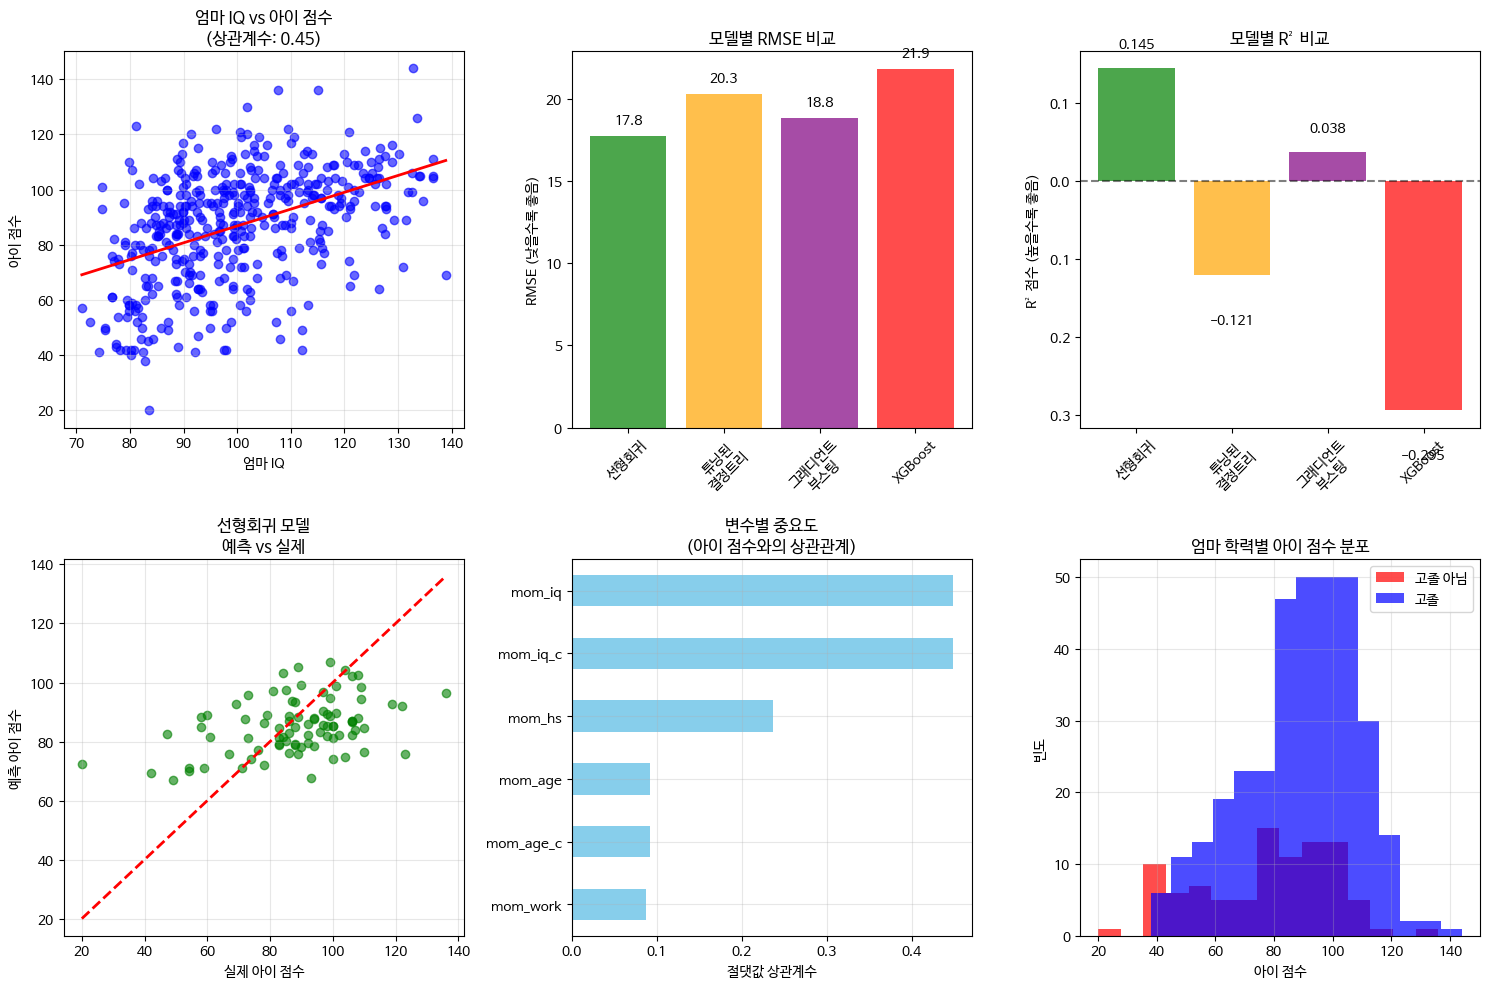

In [22]:
# 19. 결론(부모의 IQ와 아이의 IQ는 연관이 있을까?)에 대해 설명하고 결과를 시각적으로 자료롭게 표현하세요
plt.figure(figsize=(15, 10))

# 1-1. 산점도
plt.subplot(2, 3, 1)
plt.scatter(kidiq_df['mom_iq'], kidiq_df['kid_score'], alpha=0.6, color='blue')
plt.plot(np.unique(kidiq_df['mom_iq']),
         np.poly1d(np.polyfit(kidiq_df['mom_iq'], kidiq_df['kid_score'], 1))(np.unique(kidiq_df['mom_iq'])),
         color='red', linewidth=2)
plt.xlabel('엄마 IQ')
plt.ylabel('아이 점수')
plt.title('엄마 IQ vs 아이 점수\n(상관계수: 0.45)')
plt.grid(True, alpha=0.3)

# 1-2. RMSE 비교
plt.subplot(2, 3, 2)
models = ['선형회귀', '튜닝된\n결정트리', '그래디언트\n부스팅', 'XGBoost']
rmse_scores = [17.76, 20.34, rmse_gb, rmse_xgb]
colors = ['green', 'orange', 'purple', 'red']

bars = plt.bar(models, rmse_scores, color=colors, alpha=0.7)
plt.ylabel('RMSE (낮을수록 좋음)')
plt.title('모델별 RMSE 비교')
plt.xticks(rotation=45)

for bar, score in zip(bars, rmse_scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
             f'{score:.1f}', ha='center', va='bottom')

# 1-3. R² 비교
plt.subplot(2, 3, 3)
r2_scores = [0.145, -0.121, r2_gb, r2_xgb]
bars = plt.bar(models, r2_scores, color=colors, alpha=0.7)
plt.ylabel('R² 점수 (높을수록 좋음)')
plt.title('모델별 R² 비교')
plt.xticks(rotation=45)
plt.axhline(y=0, color='black', linestyle='--', alpha=0.5)

for bar, score in zip(bars, r2_scores):
    plt.text(bar.get_x() + bar.get_width()/2,
             bar.get_height() + (0.02 if score >= 0 else -0.05),
             f'{score:.3f}', ha='center', va='bottom' if score >= 0 else 'top')

# 1-4. 예측 vs 실제
plt.subplot(2, 3, 4)
y_pred_best = model.predict(X_test)
plt.scatter(y_test, y_pred_best, alpha=0.6, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('실제 아이 점수')
plt.ylabel('예측 아이 점수')
plt.title('선형회귀 모델\n예측 vs 실제')
plt.grid(True, alpha=0.3)

# 1-5. 변수 중요도
plt.subplot(2, 3, 5)
correlations = kidiq_df.corr()['kid_score'].drop('kid_score').abs().sort_values(ascending=True)
correlations.plot(kind='barh', color='skyblue')
plt.xlabel('절댓값 상관계수')
plt.title('변수별 중요도\n(아이 점수와의 상관관계)')
plt.grid(True, alpha=0.3)

# 1-6. 학력별 분포
plt.subplot(2, 3, 6)
high_school = kidiq_df[kidiq_df['mom_hs'] == 1]['kid_score']
no_high_school = kidiq_df[kidiq_df['mom_hs'] == 0]['kid_score']

plt.hist(no_high_school, alpha=0.7, label='고졸 아님', color='red', bins=15)
plt.hist(high_school, alpha=0.7, label='고졸', color='blue', bins=15)
plt.xlabel('아이 점수')
plt.ylabel('빈도')
plt.title('엄마 학력별 아이 점수 분포')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [24]:
# 20. Cross validation 결과에서 특정 Fold에만 결과가 잘 나오는 경우 어떻게 처리해야 하는지 설명하세요
# 성능 안정성 평가
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
print(f"평균: {cv_scores.mean():.3f}")
print(f"표준편차: {cv_scores.std():.3f}")
print(f"최악 성능: {cv_scores.min():.3f}")
print(f"변동계수: {cv_scores.std()/abs(cv_scores.mean()):.3f}")  # 0.1 이하가 안정적

# 평균: -363.078
# 표준편차: 117.192       <- 편차가 매우 큼
# 최악 성능: -590.260     <- 일부 Fold에서 극단적으로 성능이 나쁨
# 변동계수: 0.323         <- 기준 대비 3배 이상 높음

평균: -363.078
표준편차: 117.192
최악 성능: -590.260
변동계수: 0.323


### # 20. Cross validation 결과에서 특정 Fold에만 결과가 잘 나오는 경우 어떻게 처리해야 하는지 설명하세요

1. 데이터 셔플링 강화

- 문제: 데이터가 순서대로 나뉘어서 특정 Fold에만 쉬운/어려운 데이터 몰림
- 해결: 데이터를 무작위로 섞어서 각 Fold가 고르게 분포되도록 함
- 방법: `shuffle=True` 설정하거나 `RepeatedKFold` 사용해서 여러 번 섞어서 검증


2. 정규화 기법 적용

- 문제: 모델이 훈련 데이터에 과도하게 맞춰져서 새로운 데이터에 일관성 없음
- 해결: 모델 복잡도를 제한해서 과적합 방지
- 방법: Ridge(가중치 크기 제한) 또는 Lasso(불필요한 변수 제거) 사용


3. 앙상블 모델 검토

- 문제: 단일 모델은 데이터 변화에 민감함
- 해결: 여러 모델의 평균을 내서 안정성 확보
- 방법: RandomForest(여러 트리 평균) 또는 Bagging(여러 모델 조합) 사용

4. 하이퍼파라미터 튜닝 재검토

- 문제: 현재 파라미터가 특정 데이터에만 최적화됨
- 해결: 다양한 파라미터 조합을 시도해서 가장 안정적인 설정 찾기
- 방법: GridSearch로 여러 파라미터 값을 체계적으로 테스트